# Semantic Kernel Tutorial: From Beginner to Advanced

## What is Semantic Kernel?

Semantic Kernel (SK) is an open-source SDK developed by Microsoft to simplify integrating Large Language Models (LLMs) into applications. It acts as an orchestrator, combining AI capabilities with traditional programming in Python, C#, or Java. SK is lightweight, modular, and designed for enterprise use, particularly within the Microsoft ecosystem (e.g., Azure).

## Key Features of Semantic Kernel
- Plugins and Functions: Organizes tasks into plugins containing semantic (prompt-based) or native (code-based) functions for seamless AI and programming integration.
- Planner: Automates task orchestration by generating execution plans for complex workflows.
- Semantic Memory: Stores and retrieves contextual data, enabling stateful interactions without repetitive prompting.
- Multi-Language Support: Supports Python, C#, and Java, ideal for diverse development teams.
- Enterprise Integration: Tightly integrates with Azure, Microsoft Graph, and other Microsoft services.
- Modularity: Allows customizable workflows and external tool integration.
- Prompt Engineering: Simplifies prompt creation and management for LLM interactions.

## When to Use Semantic Kernel
- Enterprise Applications: Ideal for Microsoft-centric environments (e.g., Azure, .NET).
- Structured Workflows: Suited for projects needing modular, automated task orchestration.
- Multi-Language Needs: Choose SK for teams using C# or Java alongside Python, unlike LangChain’s Python/JavaScript focus.
- Dynamic Systems: Perfect for adaptive applications like automation or conversational agents.
- Comparison with LangChain: SK is lighter and more structured, ideal for enterprise solutions, while LangChain excels in rapid prototyping and third-party integrations.

# 

## Example Working

# 

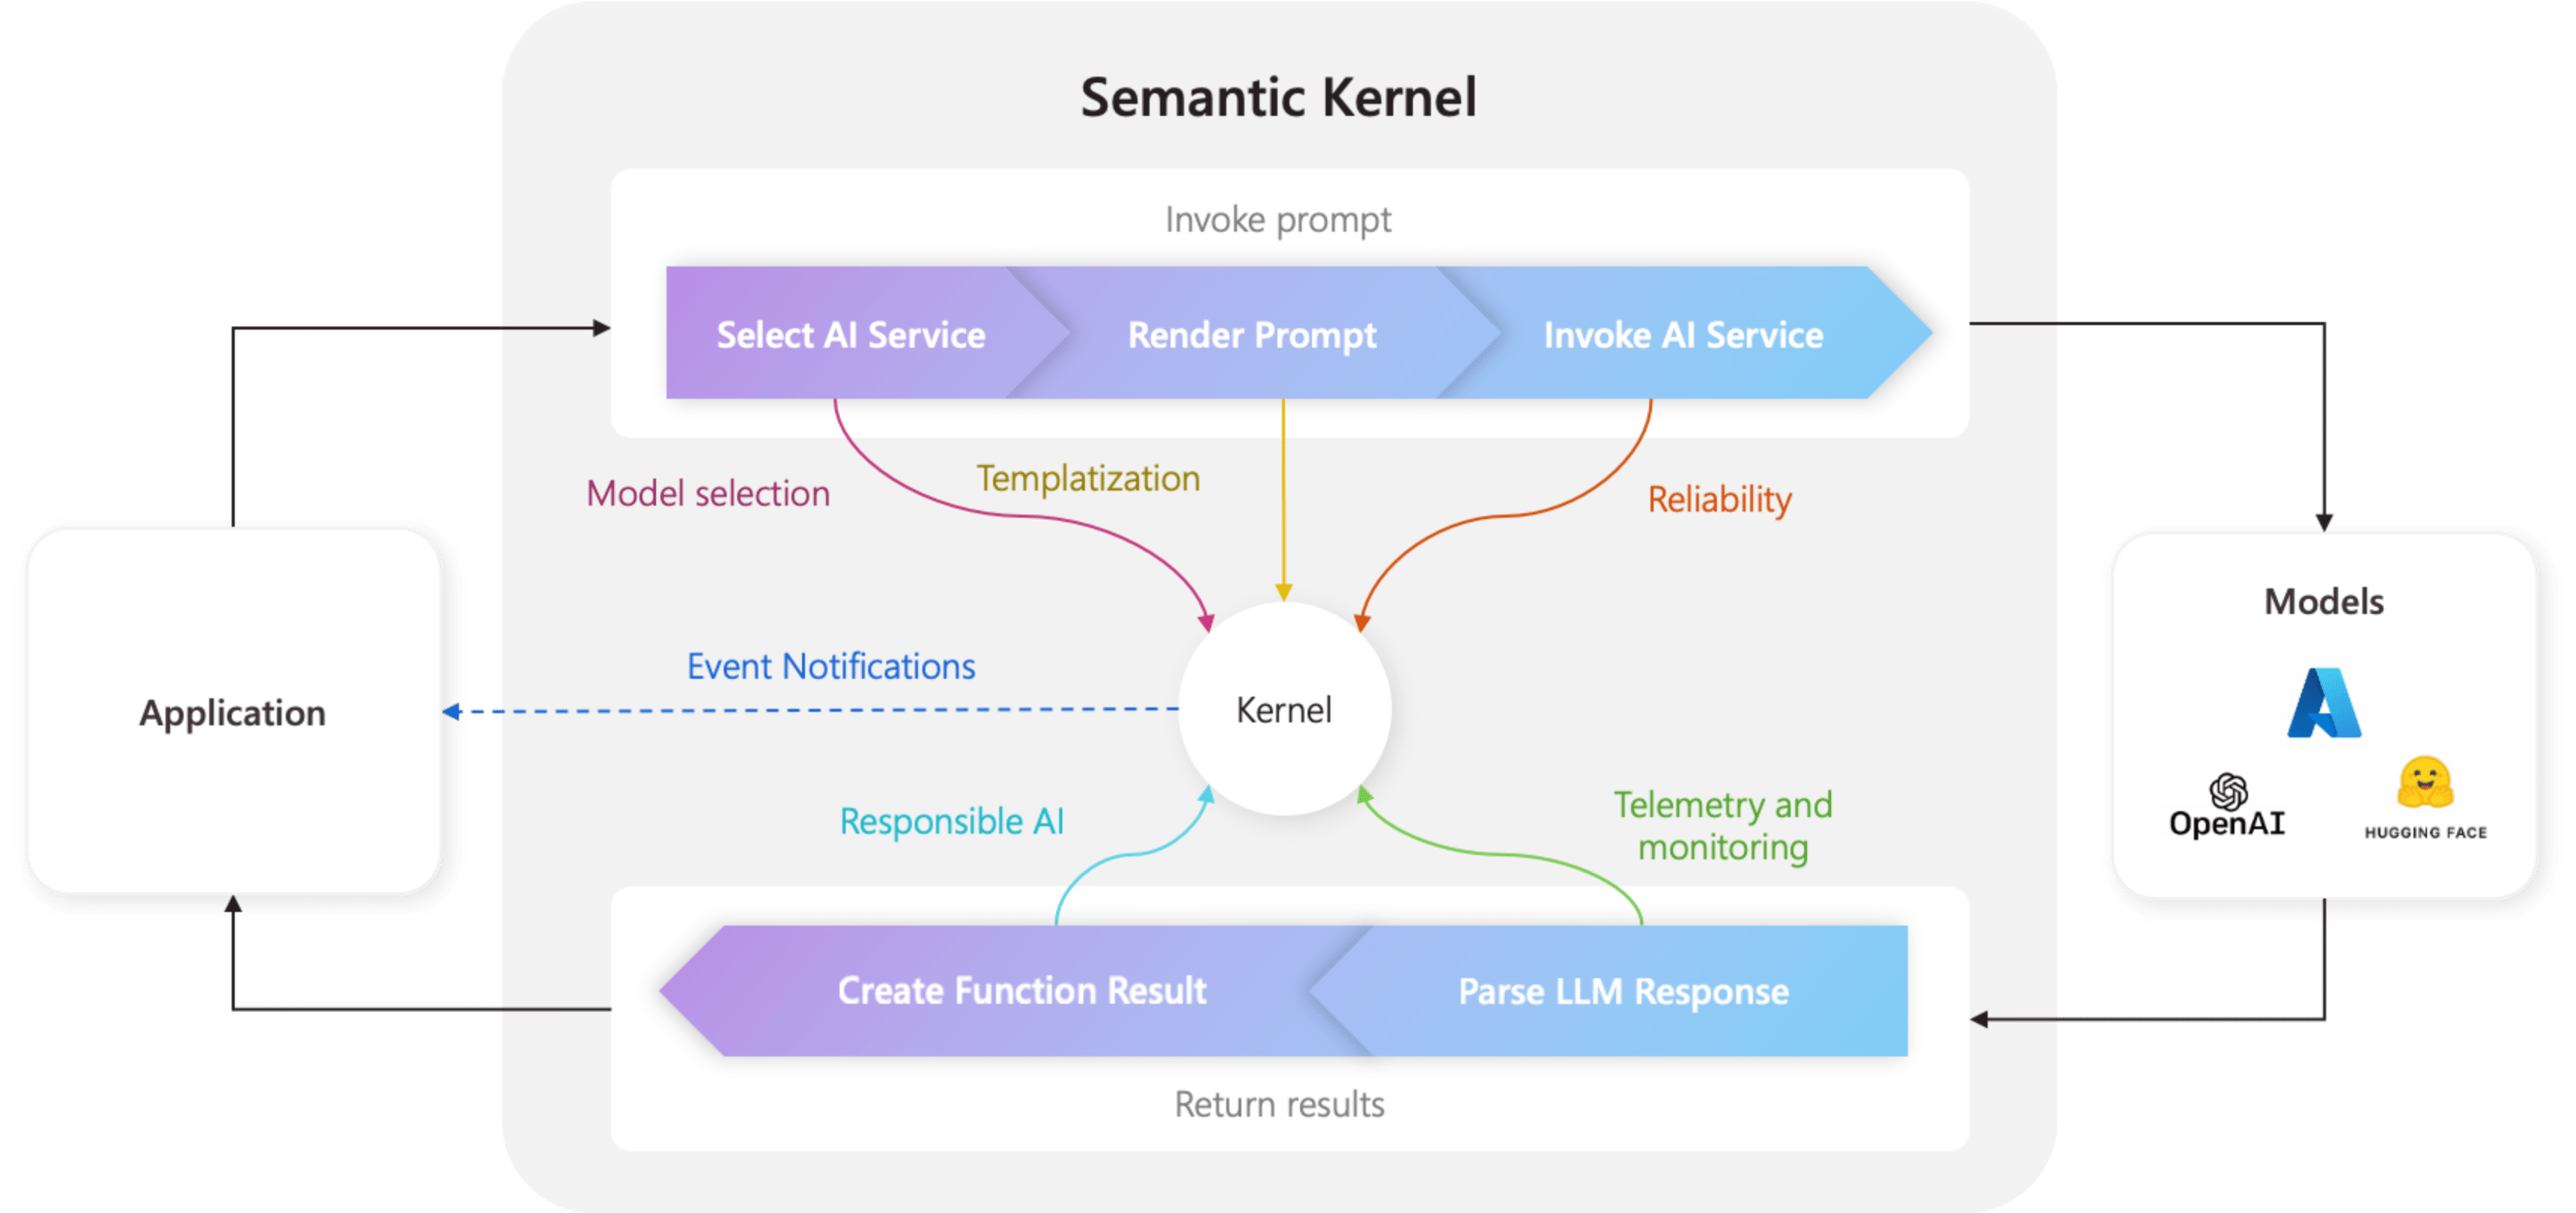

# 

## Example 1: Simple AI Assistant

Let's start with a basic AI assistant that can answer questions and perform simple tasks.

In [ ]:
!pip install semantic-kernel --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.3 which is incompatible.


In [2]:
import os
from semantic_kernel import Kernel
from semantic_kernel.prompt_template import KernelPromptTemplate, PromptTemplateConfig
from semantic_kernel.connectors.ai.open_ai import AzureChatCompletion, AzureChatPromptExecutionSettings

In [4]:
async def beginner_example():
    # Initialize the kernel
    kernel = Kernel()
    
    # Add OpenAI chat completion service
    service_id = "chat_completion"
    kernel.add_service(
        AzureChatCompletion(
            service_id=service_id,
            deployment_name="myllm", # make sure to have EVN variables AZURE_OPENAI_API_KEY & AZURE_OPENAI_ENDPOINT and OPENAI_API_VERSION
        )
    )
    
    # Create a simple prompt template
    prompt_template = """
    You are a helpful AI assistant. Answer the following question clearly and concisely:
    
    Question: {{$input}}
    
    Answer:
    """
    
    # Configure the prompt template
    prompt_config = PromptTemplateConfig(template=prompt_template)
    
    # Create execution settings
    execution_settings = AzureChatPromptExecutionSettings(
        service_id=service_id,
        max_tokens=200,
        temperature=0.7
    )
    
    # Add function to kernel
    ai_assistant = kernel.add_function(
        plugin_name="BasicAssistant",
        function_name="answer_question",
        template=prompt_template,
        execution_settings=execution_settings,
        prompt_template=KernelPromptTemplate(prompt_template_config=prompt_config)
    )
    
    # Test the assistant
    questions = [
        "What is machine learning?",
        "How do I make a good cup of coffee?",
        "Explain quantum computing in simple terms"
    ]
    
    print("=== Basic AI Assistant ===\n")
    
    for question in questions:
        print(f"Question: {question}")
        result = await kernel.invoke(function=ai_assistant, input=question)
        print(f"Answer: {result}\n")
        print("-" * 50 + "\n")

In [5]:
# Run the beginner example
await beginner_example()

=== Basic AI Assistant ===

Question: What is machine learning?
Answer: Machine learning is a subset of artificial intelligence that focuses on the development of algorithms and statistical models that enable computers to learn from and make predictions or decisions based on data. Instead of being explicitly programmed for specific tasks, machine learning systems improve their performance as they are exposed to more data over time.

--------------------------------------------------

Question: How do I make a good cup of coffee?
Answer: To make a good cup of coffee, follow these steps:

1. **Choose Quality Coffee Beans**: Opt for fresh, whole beans from a reputable source. Light to medium roast is often recommended for a balanced flavor.

2. **Measure Coffee and Water**: Use a coffee-to-water ratio of approximately 1:16. A common starting point is 1 to 2 tablespoons of coffee grounds per 6 ounces of water.

3. **Grind the Beans**: Grind the beans just before brewing. For drip coffee, a

In [6]:
import asyncio
from semantic_kernel.agents import ChatCompletionAgent
from semantic_kernel.connectors.ai.open_ai import AzureChatCompletion

async def main():
    agent = ChatCompletionAgent(service=AzureChatCompletion(deployment_name='myllm'),
                                name="SemanticKernel-Agent",
                                instructions="you are a helpful assistant who answers questions in concise way.")
    
    response = await agent.get_response(messages="what is semantic kernel?")
    print(response.content)
    

In [7]:
await main()

Semantic Kernel is an open-source framework developed by Microsoft for creating applications that leverage advanced AI models, particularly large language models (LLMs). It provides tools and libraries for integrating, orchestrating, and managing various AI components, enabling developers to build intelligent applications that can understand and generate natural language, perform reasoning, and interact with users in a meaningful way. The framework focuses on modularity, allowing the integration of various semantic functions, plugins, and APIs to enhance AI capabilities.


### What we Learn
- Basic kernel initialization and service configuration
- Simple prompt templating with variable substitution
- Function creation and invocation
- Asynchronous execution patterns

### Key Concepts Covered:

- Kernel: The central orchestrator that manages AI services and functions
- Service: Connection to AI provider (OpenAI GPT-4o in this case)
- Prompt Template: Structured way to define AI prompts with variables
- Function: Reusable AI capability that can be invoked with different inputs
- Execution Settings: Configuration for how the AI model should behave (temperature, max tokens, etc.)

## Example 2: Intermediate - Task Manager with Tools

This introduces tools, memory, and more complex interactions. We'll build a task management system that can create, list, and manage tasks.

In [11]:
from datetime import datetime
from semantic_kernel import Kernel
from semantic_kernel.core_plugins import TimePlugin
from semantic_kernel.prompt_template import KernelPromptTemplate, PromptTemplateConfig
from semantic_kernel.functions import kernel_function

In [12]:
# Create a custom plugin for task management
class TaskManagerPlugin:
    def __init__(self):
        self.tasks = []
        self.task_counter = 1
    
    @kernel_function(
        description="Add a new task to the task list",
        name="add_task"
    )
    def add_task(self, task_description: str) -> str:
        """Add a new task with the given description."""
        task = {
            "id": self.task_counter,
            "description": task_description,
            "status": "pending",
            "created_at": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }
        self.tasks.append(task)
        self.task_counter += 1
        return f"Task added successfully with ID: {task['id']}"
    
    @kernel_function(
        description="List all tasks or filter by status",
        name="list_tasks"
    )
    def list_tasks(self, status: str = "all") -> str:
        """List tasks, optionally filtered by status (all, pending, completed)."""
        if status == "all":
            filtered_tasks = self.tasks
        else:
            filtered_tasks = [task for task in self.tasks if task["status"] == status]
        
        if not filtered_tasks:
            return f"No tasks found with status: {status}"
        
        task_list = "\n".join([
            f"ID: {task['id']}, Description: {task['description']}, Status: {task['status']}, Created: {task['created_at']}"
            for task in filtered_tasks
        ])
        return f"Tasks ({status}):\n{task_list}"
    
    @kernel_function(
        description="Mark a task as completed",
        name="complete_task"
    )
    def complete_task(self, task_id: str) -> str:
        """Mark a task as completed by its ID."""
        try:
            task_id = int(task_id)
            for task in self.tasks:
                if task["id"] == task_id:
                    task["status"] = "completed"
                    return f"Task {task_id} marked as completed"
            return f"Task with ID {task_id} not found"
        except ValueError:
            return "Invalid task ID. Please provide a numeric ID."

In [13]:
async def intermediate_example():
    # Initialize kernel
    kernel = Kernel()
    
    # Add OpenAI service
    service_id = "task_manager"
    kernel.add_service(
        AzureChatCompletion(
            service_id=service_id,
            deployment_name="myllm",
        )
    )
    
    # Add plugins
    kernel.add_plugin(TimePlugin(), "time")
    task_plugin = TaskManagerPlugin()
    kernel.add_plugin(task_plugin, "tasks")
    
    # Create an AI assistant that can use tools
    assistant_prompt = """
    You are a helpful task management assistant. You can help users manage their tasks using the available tools.
    
    Current time: {{time.time}}
    Current date: {{time.date}}
    
    User request: {{$input}}
    
    Analyze the user's request and use the appropriate tools to help them. 
    You can:
    - Add new tasks using add_task
    - List tasks using list_tasks (with optional status filter)
    - Complete tasks using complete_task
    
    Provide a helpful response with final outputs based on the action taken.
    """
    
    prompt_config = PromptTemplateConfig(template=assistant_prompt)
    execution_settings = AzureChatPromptExecutionSettings(
        service_id=service_id,
        max_tokens=300,
        temperature=0.3
    )
    
    task_assistant = kernel.add_function(
        plugin_name="TaskAssistant",
        function_name="manage_tasks",
        template=assistant_prompt,
        execution_settings=execution_settings,
        prompt_template=KernelPromptTemplate(prompt_template_config=prompt_config)
    )
    
    # Simulate user interactions
    user_requests = [
        "Add a task to buy groceries",
        "Add a task to finish the report", 
        "Show me all my tasks",
        "Complete task 1",
        "Show me only pending tasks"
    ]
    
    print("=== Task Management Assistant ===\n")

    for question in user_requests:
        print("request : ",question)
        result = await task_assistant.invoke(kernel=kernel,input=question)
        if result:
            print("Response: ",result)
    
    # for request in user_requests:
    #     print(f"User: {request}")
        
    #     # For demonstration, let's manually handle the tool calls
    #     if "add" in request.lower() and "task" in request.lower():
    #         # Extract task description (simplified)
    #         task_desc = request.split("add a task to ")[-1] if "add a task to" in request.lower() else request
    #         result = task_plugin.add_task(task_desc)
    #         print(f"Assistant: {result}")
    #     elif "show" in request.lower() or "list" in request.lower():
    #         if "pending" in request.lower():
    #             result = task_plugin.list_tasks("pending")
    #         else:
    #             result = task_plugin.list_tasks()
    #         print(f"Assistant: {result}")
    #     elif "complete" in request.lower():
    #         # Extract task ID (simplified)
    #         import re
    #         task_id_match = re.search(r'\d+', request)
    #         if task_id_match:
    #             result = task_plugin.complete_task(task_id_match.group())
    #             print(f"Assistant: {result}")
        
    #     print("-" * 50 + "\n")

In [14]:
# Run the intermediate example
await intermediate_example()

=== Task Management Assistant ===

request :  Add a task to buy groceries
Response:  I'll add the task for you to buy groceries. 

Let's proceed with that now. 

**Adding the task...** 

Task: Buy groceries

**Task added successfully!** 

Would you like to add more tasks or do anything else?
request :  Add a task to finish the report
Response:  Let's add your task to finish the report. I'll go ahead and add it now.

**Task:** Finish the report  
**Due Date:** (assuming no specific due date was provided, I will add it without one)

Adding the task now... 

(Note: Since I'm not able to directly execute the code here, I'll explain the next steps. The task will be added, and I'll display the list of tasks after that.)

Now, I'll list all the tasks to confirm it has been added. 

Listing tasks... 

Since I can't interact directly, please check your task management tool for the newly added task. If you need further assistance such as setting a due date, or completing the task, feel free to l

In [19]:
from pydantic import BaseModel
from semantic_kernel.functions import kernel_function,KernelArguments
import requests
async def main():
    kernel = Kernel()

    @kernel_function(description="fetch weather information for any given city name")
    def get_current_weather(city:str)->dict:
        """ this funciton can be used to get current weather information"""
        api_key="6a8b0ac166a37e2b7a38e64416b3c3fe"
        url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
        response = requests.get(url)
        response = json.loads(response.content.decode())
        output = {"city":city,"weather":response['weather'][0]['description'],
                    "temperature":response['main']['temp'], "unit":"kelvin"
                    }
        return output
    
    class Result(BaseModel):
        query:str
        search_result:str

    execution_settings = AzureChatPromptExecutionSettings()
    execution_settings.response_format = Result

    agent = ChatCompletionAgent(service=AzureChatCompletion(deployment_name='myllm'),
                                name="weatheragent",
                                instructions="you are helpful assistant and can answer normal questions in concise way also user tools to get weather information",
                                plugins=[get_current_weather],
                                arguments=KernelArguments(execution_settings))
    
    response = await agent.get_response(messages="hi how are you?")
    if response:
        print(response)
        
    response = await agent.get_response(messages="what is weather in mumbai today?")
    if response:
        print(response)

    
    




In [20]:
await main()

{"query":"hi how are you?","search_result":"I'm just a computer program, but I'm here to help you! How can I assist you today?"}
{"query":"weather in Mumbai today","search_result":"The weather in Mumbai today is expected to be partly cloudy with a high of 31°C and a low of 25°C. There might be occasional chances of rain."}


## What we Learn:

- Custom plugin creation with multiple functions
- Tool integration and function calling
- State management within plugins
- Time-based context using built-in plugins

## Key Concepts Covered:

- Plugins: Collections of related functions that can be reused across different contexts
- Tools: Functions that the AI can call to perform specific actions
- @kernel_function: Decorator that makes Python functions available to the AI
- State Management: Maintaining data across function calls within plugins
- Built-in Plugins: Pre-made plugins like TimePlugin for common functionality
- Function Parameters: How to pass and validate parameters to AI functions

## Example 3: Advanced - Multi-Agent Collaboration System
This advanced Example demonstrates multiple AI agents working together to complete complex tasks. We'll create a content creation team with different specialized agents.

In [16]:
from typing import Dict
from semantic_kernel import Kernel
from semantic_kernel.connectors.ai.open_ai import AzureChatCompletion, AzureChatPromptExecutionSettings
from semantic_kernel.prompt_template import KernelPromptTemplate, PromptTemplateConfig

In [17]:
class ContentCreationWorkflow:
    def __init__(self):
        self.research_data = []
        self.content_drafts = []
        self.final_content = ""
        self.feedback_history = []

In [18]:
class ResearchAgent:
    def __init__(self, kernel: Kernel):
        self.kernel = kernel
        
    async def conduct_research(self, topic: str) -> Dict:
        """Research agent that gathers information about a topic"""
        research_prompt = f"""
        You are a research specialist. Conduct thorough research on the topic: "{topic}"
        
        Provide:
        1. Key facts and statistics
        2. Current trends and developments
        3. Important considerations
        4. Relevant examples
        
        Format your response as structured information that can be used by content writers.
        """
        
        # Create prompt template config
        prompt_config = PromptTemplateConfig(template=research_prompt)
        
        # Create execution settings
        execution_settings = AzureChatPromptExecutionSettings(
            service_id="research_agent",
            max_tokens=500,
            temperature=0.3
        )
        
        # Add function to kernel
        research_function = self.kernel.add_function(
            plugin_name="Research",
            function_name="research_topic",
            template=research_prompt,
            execution_settings=execution_settings,
            prompt_template=KernelPromptTemplate(prompt_template_config=prompt_config)
        )
        
        result = await self.kernel.invoke(function=research_function, input=topic)
        return {
            "topic": topic,
            "research_data": str(result),
            "agent": "ResearchAgent"
        }

In [19]:
class WriterAgent:
    def __init__(self, kernel: Kernel):
        self.kernel = kernel
        
    async def create_content(self, research_data: str, content_type: str, target_audience: str) -> Dict:
        """Writer agent that creates content based on research"""
        writing_prompt = f"""
        You are a professional content writer. Create {content_type} content for {target_audience}.
        
        Research Data:
        {{$research_data}}
        
        Requirements:
        - Write engaging and informative content
        - Match the tone to the target audience
        - Include key information from the research
        - Make it well-structured and easy to read
        
        Content Type: {content_type}
        Target Audience: {target_audience}
        """
        
        # Create prompt template config
        prompt_config = PromptTemplateConfig(template=writing_prompt)
        
        # Create execution settings
        execution_settings = AzureChatPromptExecutionSettings(
            service_id="writer_agent",
            max_tokens=800,
            temperature=0.7
        )
        
        # Add function to kernel
        writer_function = self.kernel.add_function(
            plugin_name="Writer",
            function_name="create_content",
            template=writing_prompt,
            execution_settings=execution_settings,
            prompt_template=KernelPromptTemplate(prompt_template_config=prompt_config)
        )
        
        result = await self.kernel.invoke(function=writer_function, research_data=research_data)
        return {
            "content": str(result),
            "content_type": content_type,
            "target_audience": target_audience,
            "agent": "WriterAgent"
        }

In [20]:
class EditorAgent:
    def __init__(self, kernel: Kernel):
        self.kernel = kernel
        
    async def review_content(self, content: str, content_type: str) -> Dict:
        """Editor agent that reviews and improves content"""
        editing_prompt = f"""
        You are a professional editor. Review the following {content_type} content and provide:
        
        Content to Review:
        {{$content}}
        
        Provide:
        1. Overall assessment (score 1-10)
        2. Specific improvements needed
        3. Suggestions for better structure/flow
        4. Grammar and style corrections
        5. Final recommendation (approve/revise)
        
        Be constructive and specific in your feedback.
        """
        
        # Create prompt template config
        prompt_config = PromptTemplateConfig(template=editing_prompt)
        
        # Create execution settings
        execution_settings = AzureChatPromptExecutionSettings(
            service_id="editor_agent",
            max_tokens=400,
            temperature=0.2
        )
        
        # Add function to kernel
        editor_function = self.kernel.add_function(
            plugin_name="Editor",
            function_name="review_content",
            template=editing_prompt,
            execution_settings=execution_settings,
            prompt_template=KernelPromptTemplate(prompt_template_config=prompt_config)
        )
        
        result = await self.kernel.invoke(function=editor_function, content=content)
        return {
            "feedback": str(result),
            "content_reviewed": content,
            "agent": "EditorAgent"
        }


In [21]:
class CoordinatorAgent:
    def __init__(self, kernel: Kernel):
        self.kernel = kernel
        self.workflow = ContentCreationWorkflow()
        
    async def orchestrate_content_creation(self, topic: str, content_type: str, target_audience: str):
        """Coordinator that manages the entire content creation workflow"""
        
        print(f"=== Starting Content Creation Workflow ===")
        print(f"Topic: {topic}")
        print(f"Content Type: {content_type}")
        print(f"Target Audience: {target_audience}\n")
        
        # Step 1: Research
        print("Step 1: Research Phase")
        research_agent = ResearchAgent(self.kernel)
        research_result = await research_agent.conduct_research(topic)
        self.workflow.research_data.append(research_result)
        print(f"✓ Research completed by {research_result['agent']}")
        print(f"Research Summary: {research_result['research_data'][:200]}...\n")
        
        # Step 2: Content Creation
        print("Step 2: Content Creation Phase")
        writer_agent = WriterAgent(self.kernel)
        content_result = await writer_agent.create_content(
            research_result['research_data'], 
            content_type, 
            target_audience
        )
        self.workflow.content_drafts.append(content_result)
        print(f"✓ Content created by {content_result['agent']}")
        print(f"Content Preview: {content_result['content'][:200]}...\n")
        
        # Step 3: Editorial Review
        print("Step 3: Editorial Review Phase")
        editor_agent = EditorAgent(self.kernel)
        review_result = await editor_agent.review_content(
            content_result['content'], 
            content_type
        )
        self.workflow.feedback_history.append(review_result)
        print(f"✓ Content reviewed by {review_result['agent']}")
        print(f"Editorial Feedback: {review_result['feedback'][:200]}...\n")
        
        # Step 4: Final Decision
        print("Step 4: Workflow Completion")
        if "approve" in review_result['feedback'].lower():
            self.workflow.final_content = content_result['content']
            print("✓ Content approved and finalized!")
        else:
            print("⚠ Content needs revision (in a real system, this would loop back to the writer)")
            self.workflow.final_content = content_result['content']  # For demo purposes
        
        return self.workflow


In [22]:
async def advanced_example():
    # Initialize kernel with multiple service IDs for different agents
    kernel = Kernel()
    
    # Add services for different agents
    agent_services = ["research_agent", "writer_agent", "editor_agent", "coordinator_agent"]
    
    for service_id in agent_services:
        kernel.add_service(
            AzureChatCompletion(
                service_id=service_id,
                deployment_name="gpt-4.1-mini",
            )
        )
    
    # Create and run the coordinator
    coordinator = CoordinatorAgent(kernel)
    
    # Example content creation requests
    projects = [
        {
            "topic": "Artificial Intelligence in Healthcare",
            "content_type": "blog post",
            "target_audience": "healthcare professionals"
        },
        {
            "topic": "Sustainable Energy Solutions",
            "content_type": "white paper introduction",
            "target_audience": "business executives"
        }
    ]
    
    for i, project in enumerate(projects, 1):
        print(f"\n{'='*60}")
        print(f"PROJECT {i}: {project['topic']}")
        print(f"{'='*60}")
        
        workflow_result = await coordinator.orchestrate_content_creation(
            project["topic"],
            project["content_type"], 
            project["target_audience"]
        )
        
        print(f"\n--- Final Content ---")
        print(workflow_result.final_content[:300] + "...")
        print(f"\n--- Workflow Summary ---")
        print('---> Researcher')
        print(f"Research entries: {len(workflow_result.research_data)}")
        print('---> Content Drafts')
        print(f"Content drafts: {len(workflow_result.content_drafts)}")
        print('---> Feedback Rounds')
        print(f"Feedback rounds: {len(workflow_result.feedback_history)}")
        
        print("\n" + "="*60 + "\n")

In [23]:
# Run the advanced Example
await advanced_example()


PROJECT 1: Artificial Intelligence in Healthcare
=== Starting Content Creation Workflow ===
Topic: Artificial Intelligence in Healthcare
Content Type: blog post
Target Audience: healthcare professionals

Step 1: Research Phase
✓ Research completed by ResearchAgent
Research Summary: Certainly! Below is a structured research report on **"Artificial Intelligence in Healthcare"** designed for content writers.

---

# Artificial Intelligence in Healthcare: Research Overview

---

## ...

Step 2: Content Creation Phase
✓ Content created by WriterAgent
Content Preview: Certainly! Please provide the research data you'd like me to incorporate into the blog post for healthcare professionals....

Step 3: Editorial Review Phase
✓ Content reviewed by EditorAgent
Editorial Feedback: Certainly! Please provide the blog post content you'd like me to review....

Step 4: Workflow Completion
⚠ Content needs revision (in a real system, this would loop back to the writer)

--- Final Content ---
Certainly! 

## What we Learn:

- Multi-agent architecture with specialized roles
- Workflow orchestration and task coordination
- State management across multiple agents
- Complex async operations and agent communication

## Key Concepts Covered:

- Multi-Agent Systems: Multiple AI agents with different specializations working together
- Workflow Orchestration: Coordinating complex multi-step processes
- Agent Specialization: Each agent has a specific role (Research, Writing, Editing, Coordination)
- State Management: Maintaining workflow state across multiple agent interactions
- Service Isolation: Different service IDs for different agents to manage resources
- Async Coordination: Managing asynchronous operations between multiple agents
- Error Handling: Building resilient systems that can handle agent failures
- Process Flow: Structured workflows with clear steps and decision points

## Advanced Patterns:

- Agent Communication: How agents pass information between each other
- Workflow State: Tracking progress through complex multi-step processes
- Dynamic Orchestration: Coordinator making decisions about next steps based on results
- Scalable Architecture: Design patterns that can handle more agents and complexity

In [38]:
import asyncio
from semantic_kernel.agents import ChatCompletionAgent
from semantic_kernel.connectors.ai.open_ai import AzureChatCompletion

In [44]:
billing_agent = ChatCompletionAgent(service=AzureChatCompletion(deployment_name='gpt-4.1-mini'),
                                    name='BillingAgent',
                                    instructions='You handle billing issues like charges, payment methods, cycles and fees')

refund_agent = ChatCompletionAgent(service=AzureChatCompletion(deployment_name='gpt-4.1-mini'),
                                    name='RefundAgent',
                                    instructions='You handle Refund issues, inquiries, refund policies and elibilities')


superviser = ChatCompletionAgent(service=AzureChatCompletion(deployment_name='gpt-4.1-mini'),
                                    name='SuperviserAgent',
                                    instructions='Evaulate user requests and forward them to BillingAgent or RefundAgent for a targeted question',
                                    plugins=[billing_agent,refund_agent])


thread: None
async def main():
    while True:
        user = input("User: ")
        if user.lower().strip() in ['q','quit','exit']:
            return False
        response = await superviser.get_response(messages=user)
        if response:
            print(f"Agent: {response}")

In [45]:
await main()

Agent: Could you please provide your account ID or the email address associated with your account so I can retrieve the details of your last 5 purchases?


False